In [6]:
import os, sys
WD = "/Users/niche/Library/CloudStorage/OneDrive-VirginiaTech/github/Mautushi/Pi-Computer-Vision/"
DATA_IN = "test/data/bedroom.png"
os.chdir(WD)
sys.path.append(WD)

import numpy as np
import matplotlib.pyplot as plt
import torch
from file_io import path2imgs

## Load data

In [7]:
image = path2imgs("local", DATA_IN)[0][:, :, [2, 1, 0]]

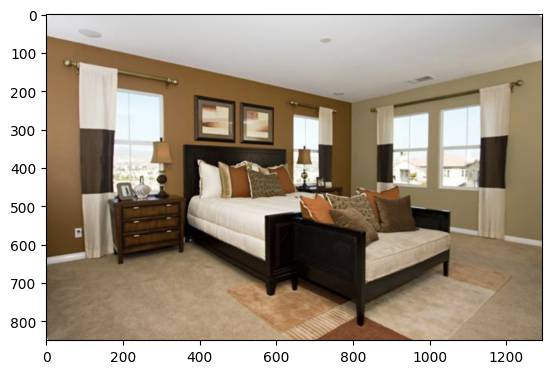

In [8]:
import matplotlib.pyplot as plt
plt.imshow(image)

In [9]:
image.shape

(850, 1294, 3)

## Inference

In [10]:
from inference import inference
from models import init_model

### model A: "nvidia/mit-b0"

In [13]:
MODELNAME = "nvidia/mit-b0"
REPO_LBS = "huggingface/label-files"
JSON_LBS = "ade20k-id2label.json"

model_A = init_model(model_name=MODELNAME, repo_lbs=REPO_LBS, json_lbs=JSON_LBS)
img_A   = inference(model_A, image, MODELNAME)

Some weights of the model checkpoint at nvidia/mit-b0 were not used when initializing SegformerForSemanticSegmentation: ['classifier.bias', 'classifier.weight']
- This IS expected if you are initializing SegformerForSemanticSegmentation from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing SegformerForSemanticSegmentation from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of SegformerForSemanticSegmentation were not initialized from the model checkpoint at nvidia/mit-b0 and are newly initialized: ['decode_head.batch_norm.running_mean', 'decode_head.linear_fuse.weight', 'decode_head.linear_c.2.proj.weight', 'decode_head.linear_c.1.proj.weight', 'decode_head.linear_c.0.proj.bias', 'decode_head.b

### model B: "nvidia/mit-b0" fine-tuned with 50 images

In [14]:
STATE   = os.path.join("models", "checkpoint-1000", "pytorch_model.bin")
model_B = init_model(model_name=MODELNAME, repo_lbs=REPO_LBS, json_lbs=JSON_LBS)
model_B.load_state_dict(torch.load(STATE))
img_B   = inference(model_B, image, MODELNAME)

Some weights of the model checkpoint at nvidia/mit-b0 were not used when initializing SegformerForSemanticSegmentation: ['classifier.bias', 'classifier.weight']
- This IS expected if you are initializing SegformerForSemanticSegmentation from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing SegformerForSemanticSegmentation from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of SegformerForSemanticSegmentation were not initialized from the model checkpoint at nvidia/mit-b0 and are newly initialized: ['decode_head.batch_norm.running_mean', 'decode_head.linear_fuse.weight', 'decode_head.linear_c.2.proj.weight', 'decode_head.linear_c.1.proj.weight', 'decode_head.linear_c.0.proj.bias', 'decode_head.b

### model C: "nvidia/segformer-b0-finetuned-ade-512-512"

In [15]:
MODELNAME = "nvidia/segformer-b0-finetuned-ade-512-512"
model_C = init_model(model_name=MODELNAME, repo_lbs=REPO_LBS, json_lbs=JSON_LBS)
img_C   = inference(model_C, image, MODELNAME)

### model D: "facebook/detr-resnet-50-panoptic"

In [16]:
MODELNAME = "facebook/detr-resnet-50-panoptic"
model_D = init_model(model_name=MODELNAME)
img_D   = inference(model_D, image, MODELNAME)

/Users/niche/miniforge3/envs/transformer/lib/python3.9/site-packages/transformers/models/detr/feature_extraction_detr.py:996: FutureWarning: `post_process_panoptic is deprecated and will be removed in v5 of Transformers, please use `post_process_panoptic_segmentation`.
  warnings.warn(


## Visualization

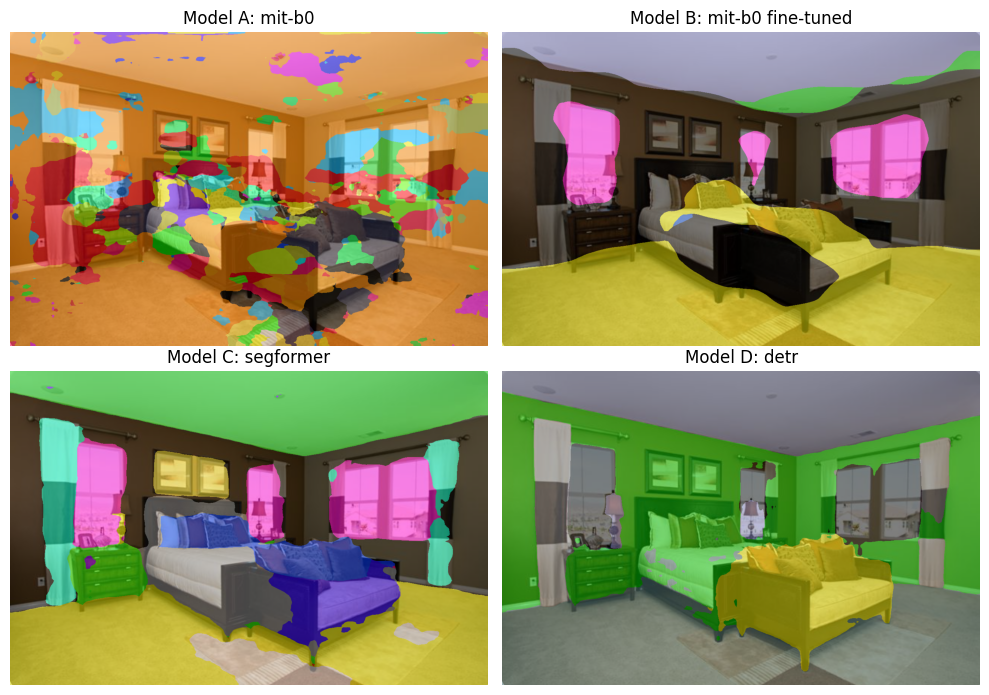

In [17]:
# multiple plot
fig, axs = plt.subplots(2, 2, figsize=(10, 7))
axs[0, 0].imshow(img_A)
axs[0, 0].set_title("Model A: mit-b0")
axs[0, 0].axis("off")

axs[0, 1].imshow(img_B)
axs[0, 1].set_title("Model B: mit-b0 fine-tuned")
axs[0, 1].axis("off")

axs[1, 0].imshow(img_C)
axs[1, 0].set_title("Model C: segformer")
axs[1, 0].axis("off")

axs[1, 1].imshow(img_D)
axs[1, 1].set_title("Model D: detr")
axs[1, 1].axis("off")
plt.tight_layout()
plt.show()

In [6]:
video_path = '/Users/niche/github/Pi-Computer-Vision/notebooks/Video_processing/dairy_cow.MOV'
fps = 0.5
segmented_frame_dir_name = 'test_data'
MODELNAME = "nvidia/segformer-b0-finetuned-ade-512-512"
model_C = init_model(model_name=MODELNAME, repo_lbs=REPO_LBS, json_lbs=JSON_LBS)


In [7]:
npImg(video_path,fps,segmented_frame_dir_name,model_C,MODELNAME)

Reading video file.
Creating a directory name test_data
Extracting Frames
reading here
reading here
reading here
reading here
reading here
reading here
reading here
reading here
reading here
reading here
reading here
reading here
reading here
reading here
reading here
reading here
reading here
All Frames Are Extracted
